#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

#importing dataset

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9d9db1184aaf41b18678751b44d5d215 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='z3bHdnykm5UiJLsmMRIduva9NythtdpWEVAHSAwNNQJi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9d9db1184aaf41b18678751b44d5d215.get_object(Bucket='lifeexpectancy-donotdelete-pr-edk0w3aqpbsdmi',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#deleting unnecessary column

In [5]:
df_data_2 = df_data_2.drop(['Year'], axis = 1)
df_data_2.head();
status=pd.get_dummies(df_data_2.Status);
df_data_2 = pd.concat([df_data_2, status], axis = 1)
df_data_2 = df_data_2.drop(['Status'], axis=1)
df_data_2.rename(columns = {'Developing' : '0', 'Developed' : 1})
df_data_2.head();


In [6]:
print(df_data_2.head())

       Country  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan              65.0            263.0             62     0.01   
1  Afghanistan              59.9            271.0             64     0.01   
2  Afghanistan              59.9            268.0             66     0.01   
3  Afghanistan              59.5            272.0             69     0.01   
4  Afghanistan              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   ...  Diphtheria    HIV/AIDS         GDP  Population   thinn

In [7]:
df_data_2 = df_data_2.groupby('Country').mean()

In [8]:
print(df_data_2.head());

                     Life expectancy   Adult Mortality  infant deaths  \
Country                                                                 
Afghanistan                  58.19375         269.0625        78.2500   
Albania                      75.15625          45.0625         0.6875   
Algeria                      73.61875         108.1875        20.3125   
Angola                       49.01875         328.5625        83.7500   
Antigua and Barbuda          75.05625         127.5000         0.0000   

                      Alcohol  percentage expenditure  Hepatitis B   Measles   \
Country                                                                         
Afghanistan          0.014375               34.960110    64.562500  2362.2500   
Albania              4.848750              193.259091    98.000000    53.3750   
Algeria              0.406667              236.185241    78.000000  1943.8750   
Angola               5.740667              102.100268    70.222222  3561.3125   
An

In [9]:
df_data_2.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

Text(0, 0.5, 'Life expectancy')

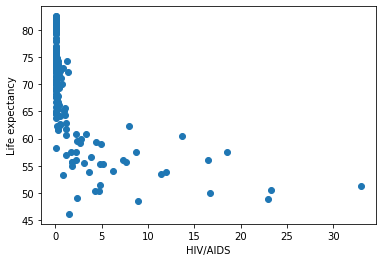

In [10]:
import matplotlib as plt
plt.pyplot.scatter(df_data_2[' HIV/AIDS'], df_data_2['Life expectancy '])
plt.pyplot.xlabel('HIV/AIDS')
plt.pyplot.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

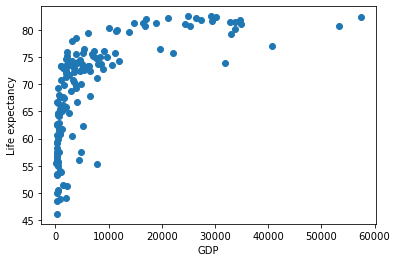

In [11]:
plt.pyplot.scatter(df_data_2['GDP'], df_data_2['Life expectancy '])
plt.pyplot.xlabel('GDP')
plt.pyplot.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

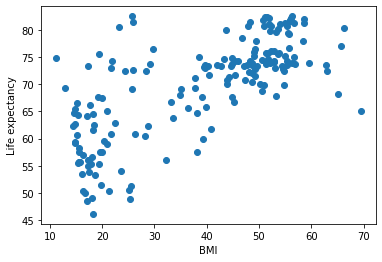

In [12]:
plt.pyplot.scatter(df_data_2[' BMI '], df_data_2['Life expectancy '])
plt.pyplot.xlabel('BMI')
plt.pyplot.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

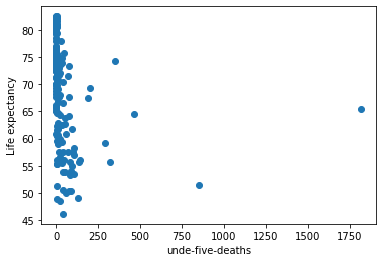

In [13]:
plt.pyplot.scatter(df_data_2['under-five deaths '], df_data_2['Life expectancy '])
plt.pyplot.xlabel('unde-five-deaths')
plt.pyplot.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

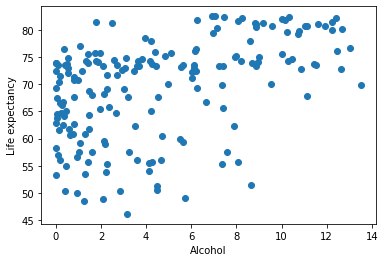

In [14]:
plt.pyplot.scatter(df_data_2['Alcohol'], df_data_2['Life expectancy '])
plt.pyplot.xlabel('Alcohol')
plt.pyplot.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

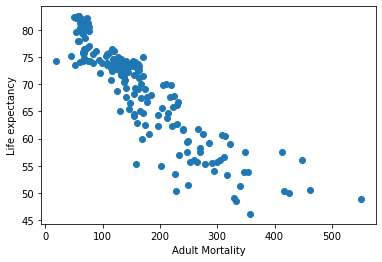

In [15]:
plt.pyplot.scatter(df_data_2['Adult Mortality'], df_data_2['Life expectancy '])
plt.pyplot.xlabel('Adult Mortality')
plt.pyplot.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

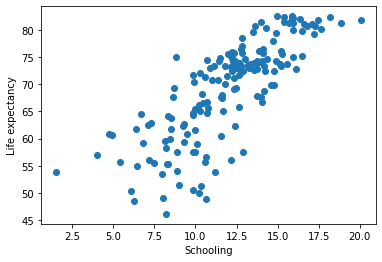

In [16]:
plt.pyplot.scatter(df_data_2['Schooling'], df_data_2['Life expectancy '])
plt.pyplot.xlabel('Schooling')
plt.pyplot.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

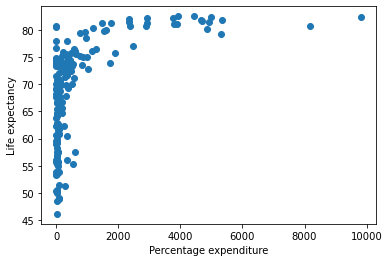

In [17]:
plt.pyplot.scatter(df_data_2['percentage expenditure'], df_data_2['Life expectancy '])
plt.pyplot.xlabel('Percentage expenditure')
plt.pyplot.ylabel('Life expectancy')

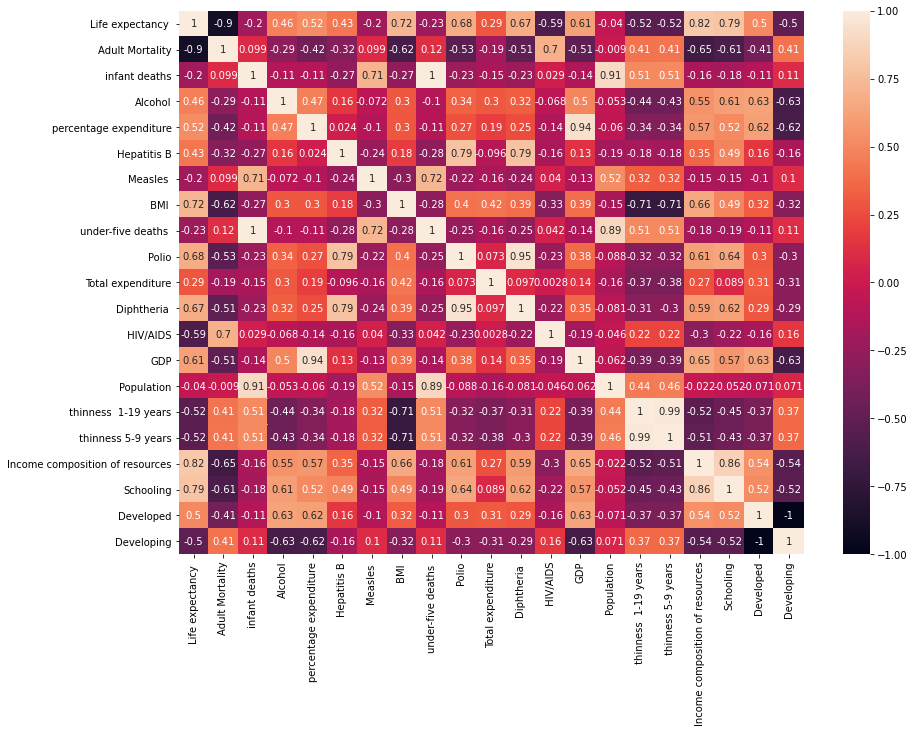

In [18]:
plt.pyplot.figure(figsize = (14, 10))
sns.heatmap(df_data_2.corr(), annot = True)

In [19]:
y_axis = df_data_2['Life expectancy ']
x_axis = df_data_2.drop('Life expectancy ', axis = 1)

In [20]:
x_axis.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [21]:
x_axis.isnull().sum()


Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [22]:
y_axis.isnull().sum()


10

In [23]:
x_axis.fillna(value = x_axis.mean(), inplace = True)
x_axis.head();

In [24]:
y_axis.fillna(value = y_axis.mean(), inplace = True)

In [25]:
stats.describe(x_axis[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [26]:
min_max_scaler = MinMaxScaler()

In [27]:
min_max_scaler.fit(x_axis)
x_axis = min_max_scaler.transform(x_axis)

In [28]:
x_axis

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [29]:
x_axis_train, x_axis_test, y_axis_train, y_axis_test = train_test_split(
        x_axis, y_axis, train_size = 0.7, test_size = 0.3)

#Linear regression
using linear regression building model

In [30]:
linear_model = LinearRegression()

In [31]:
ln_fit=linear_model.fit(x_axis_train, y_axis_train)
linear_score = cross_val_score(ln_fit, x_axis_train, y_axis_train, cv = 5)
print("mean cross validation score: %.2f"  % np.mean(linear_score))

mean cross validation score: 0.88


In [32]:
print('R_square score on the training: %.2f' % linear_model.score(x_axis_train, y_axis_train))

R_square score on the training: 0.93


In [33]:
linear_model_predict = linear_model.predict(x_axis_test)

In [34]:
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [ -27.14780531  115.15751441    2.71965027   -0.33071389   -4.03700364
    9.33993473    3.35979308 -131.995731      2.41517015   -1.17117399
    7.91227413   -4.7180522     2.5704229     6.46935763   25.03932795
  -22.68891188    5.22322768    6.05351979    0.24158059   -0.24158059]


In [35]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_axis_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_axis_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(y_axis_test, linear_model_predict))

Mean squared error: 10.28
Mean absolute error: 2.40
R_square score: 0.78


In [36]:
scoring = make_scorer(r2_score)

In [37]:
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)


In [38]:
grid_cv.fit(x_axis_train, y_axis_train)
print("Best Parameters: " + str(grid_cv.best_params_))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.19597e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.92775e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.19597e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.92775e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.19597e-18): result may not be accurat

Best Parameters: {'alpha': 1, 'max_iter': 10}


In [39]:
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(x_axis_train, y_axis_train))
print("R^2 score: %.2f"
      % r2_score(y_axis_test, grid_cv.best_estimator_.predict(x_axis_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_axis_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_axis_test, linear_model_predict))

R^2 score on training data: 0.92
R^2 score: 0.84
Mean squared error: 10.28
Mean absolute error: 2.40


In [40]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(x_axis_train, y_axis_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(x_axis_train, y_axis_train))
print("R^2 score: %.2f"
      % r2_score(y_axis_test, grid_cv.best_estimator_.predict(x_axis_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_axis_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_axis_test, linear_model_predict))


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.99918965013677, tolerance: 0.9498007735899348
  positive)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression es

Best Parameters: {'alpha': 0, 'max_iter': 10}
R^2 score on training data: 0.93
R^2 score: 0.83
Mean squared error: 10.28
Mean absolute error: 2.40


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.66840015828427, tolerance: 1.2084847821764928
  positive)


In [41]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(x_axis_train, y_axis_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(x_axis_train, y_axis_train))
print("R^2 score: %.2f"
      % r2_score(y_axis_test, grid_cv.best_estimator_.predict(x_axis_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_axis_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_axis_test, linear_model_predict))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.99918965013677, tolerance: 0.9498007735899348
  positive)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression es

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 10}
R^2 score on training data: 0.93
R^2 score: 0.83
Mean squared error: 10.28
Mean absolute error: 2.40


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.66840015828427, tolerance: 1.2084847821764928
  positive)


#Linear regression with polynomial features

In [42]:
quad_feature_transformer = PolynomialFeatures(2, interaction_only = True)
quad_feature_transformer.fit(x_axis_train)
life_features_train_quad = quad_feature_transformer.transform(x_axis_train)
life_features_test_quad = quad_feature_transformer.transform(x_axis_test)

In [43]:
poly_model_quad = LinearRegression()
poly_model_quad.fit(life_features_train_quad, y_axis_train)
accuracy_score_quad = poly_model_quad.score(life_features_train_quad, y_axis_train)
print(accuracy_score_quad)

1.0


In [44]:
poly_model_quad_predict = poly_model_quad.predict(life_features_test_quad)

In [45]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_axis_test, poly_model_quad_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_axis_test, poly_model_quad_predict))
print('R_square score: %.2f' % r2_score(y_axis_test, poly_model_quad_predict))

Mean squared error: 100.71
Mean absolute error: 5.95
R_square score: -1.16


#decision tree regression

In [46]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_fit = decision_tree_model.fit(x_axis_train, y_axis_train)
decision_tree_score = cross_val_score(decision_tree_fit, x_axis_train, y_axis_train, cv = 5)
print("mean cross validation score: %.2f"  % np.mean(decision_tree_score))
print("score without cv: %.2f" % decision_tree_fit.score(x_axis_train, y_axis_train))
print("R^2 score on the test data %.2f"% r2_score(y_axis_test, decision_tree_fit.predict(x_axis_test)))

mean cross validation score: 0.81
score without cv: 1.00
R^2 score on the test data 0.83


In [47]:
decision_tree_model_predict = decision_tree_model.predict(x_axis_test)

In [48]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(x_axis_train, y_axis_train)
grid_cv.best_params_

print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(x_axis_train, y_axis_train))
print("R^2 score: %.2f"
      % r2_score(y_axis_test, grid_cv.best_estimator_.predict(x_axis_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_axis_test, decision_tree_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_axis_test, decision_tree_model_predict))

Best Parameters: {'min_samples_split': 5}
R^2 score on training data: 1.00
R^2 score: 0.87
Mean squared error: 8.13
Mean absolute error: 2.15


#random forest regression

In [49]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(x_axis_train, y_axis_train)
random_forest_score = cross_val_score(random_forest_fit, x_axis_train, y_axis_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
print("score without cv: %.2f"
      % random_forest_fit.score(x_axis_train, y_axis_train))
print("R^2 score on the test data %.2f"
      %r2_score(y_axis_test, random_forest_fit.predict(x_axis_test)))

mean cross validation score: 0.91
score without cv: 0.99
R^2 score on the test data 0.92


In [50]:
random_forest_model_predict = random_forest_model.predict(x_axis_test)

In [51]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(x_axis_train, y_axis_train)
grid_cv.best_params_

result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(x_axis_train, y_axis_train))
print("R^2 score: %.2f"
      % r2_score(y_axis_test, grid_cv.best_estimator_.predict(x_axis_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_axis_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_axis_test, random_forest_model_predict))

Best Parameters: {'min_samples_split': 4}
R^2 score on training data: 0.99
R^2 score: 0.91
Mean squared error: 3.94
Mean absolute error: 1.53


In [52]:
from ibm_watson_machine_learning import APIClient

In [65]:
wml_credentials={
  
  "apikey": "Tp8hjPij270sAmzEazJmboghdqjhmRzfAFLNXsHvNJsr",
  "url": "https://eu-gb.ml.cloud.ibm.com", 
}


In [66]:
client=APIClient(wml_credentials)

In [69]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return (next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [70]:
space_uid=guid_from_space_name(client,'models')
print("Space UID = "+ space_uid)

Space UID = 1c05f5c6-76d2-4e26-9d14-197ba602f879


In [71]:
client.set.default_space(space_uid)

'SUCCESS'

In [72]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

In [73]:
software_spec_uid=client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [74]:
model_details=client.repository.store_model(model=random_forest_model,meta_props={
    client.repository.ModelMetaNames.NAME:"life_expectancy_with_python",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid    
})

model_id=client.repository.get_model_uid(model_details)
    


In [75]:
model_id

'273e3ed8-bea5-4ea8-b45b-2301e0f913d6'